In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm


raw_data = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\spettro_am\spettro_Am_50mm2.dat")

data1 = []

for i in range(len(raw_data)):
    for j in range(int(raw_data[i])):
        data1.append(i)

data = np.array(data1)

signal = []
signal1 = []
signal2 = []
signal3 = []
signalc = []

for i in range(len(data)):
    if data[i] > 4300 and data[i] < 6000 : signal.append(data[i])
    if data[i] > 4920 and data[i] < 4950 : signal1.append(data[i])
    if data[i] > 4880 and data[i] < 4915 : signal2.append(data[i])
    if data[i] > 4800 and data[i] < 4880 : signal3.append(data[i])
    if data[i] > 4550 and data[i] < 4700 : signalc.append(data[i])

tot1 = 4950 - 4920
tot2 = 4915 - 4880
tot3 = 4880 - 4800
totc = 4700 - 4550

# 1 picco: 4920, 60000
#2 picco: 4880, 4915
#3 picco : 4800, 4880
#contam : 4550, 4700


"""
plt.hist(signal, bins=60)
plt.hist(signal1, bins=60)
plt.hist(signal2, bins=60)
plt.hist(signal3, bins=60)
plt.hist(signalc, bins=60)

"""
def model(x, N, mu, s):
    return N*norm.cdf(x, loc = mu, scale = s) 

N1_ext = 0
N2_ext = 0
N3_ext = 0
Nc_ext = 0

for i in range(4925, 5000): #picco1 (più a dx)
    N1_ext = N1_ext + raw_data[i]
for i in range(4875, 4925): #picco2
    N2_ext = N2_ext + raw_data[i]
for i in range(4800, 4875): #picco3
    N3_ext = N3_ext + raw_data[i]
for i in range(4550, 4700): #contaminazione
    Nc_ext = Nc_ext + raw_data[i]

numbins1=[]
chi2_1=[]

numbins2=[]
chi2_2=[]

numbins3=[]
chi2_3=[]

numbinsc=[]
chi2_c=[]
    
for nbins in range(10, 100):
       
    bin_content1, bin_edges1 = np.histogram(signal1, bins = nbins)
    costf1 = ExtendedBinnedNLL(bin_content1, bin_edges1, model)
    m1 = Minuit(costf1, N = N1_ext, mu = 4950, s = 10)
    m1.migrad()

    bin_content2, bin_edges2 = np.histogram(signal2, bins = nbins)
    costf2 = ExtendedBinnedNLL(bin_content2, bin_edges2, model)
    m2 = Minuit(costf2, N = N2_ext, mu = 4900, s = 5)
    m2.migrad()

    bin_content3, bin_edges3 = np.histogram(signal3, bins = nbins)
    costf3 = ExtendedBinnedNLL(bin_content3, bin_edges3, model)
    m3 = Minuit(costf3, N = N3_ext, mu = 4875, s = 5)
    m3.migrad()

    bin_contentc, bin_edgesc = np.histogram(signalc, bins = nbins)
    costfc = ExtendedBinnedNLL(bin_contentc, bin_edgesc, model)
    mc = Minuit(costfc, N = Nc_ext, mu = 4625 , s = 5)
    mc.migrad()
        
    #print(my_minuit.valid, my_minuit.fmin.reduced_chi2)
    if ((m1.valid == True) and (m1.fval/m1.ndof > 0 )):
        chi2_1.append(m1.fval/m1.ndof)
        numbins1.append(nbins)
        #display(my_minuit)
    
    if ((m2.valid == True) and (m2.fval/m2.ndof > 0 )):
        chi2_2.append(m2.fval/m2.ndof)
        numbins2.append(nbins)
        #display(my_minuit)
    if ((m3.valid == True) and (m3.fval/m3.ndof > 0 )):
        chi2_3.append(m3.fval/m3.ndof)
        numbins3.append(nbins)
        #display(my_minuit)
    if ((mc.valid == True) and (mc.fval/mc.ndof > 0 )):
        chi2_c.append(mc.fval/mc.ndof)
        numbinsc.append(nbins)
        #display(my_minuit)

index1 = np.array(chi2_1).argmin() #dove c'è il fit migliore 
nbins1 = numbins1[index1]
    
bin_content1, bin_edges1 = np.histogram(signal1, bins = nbins1)
N_events1 = sum(bin_content1)   
costf1 = ExtendedBinnedNLL(bin_content1, bin_edges1, model)
m1 = Minuit(costf1, N = N1_ext, mu = 4950, s = 10)

m1.migrad()
m1.hesse()
display(m1)
print(f"bins 1 = {nbins1} \n")


index2 = np.array(chi2_2).argmin() #dove c'è il fit migliore 
nbins2 = numbins2[index2]
    
bin_content2, bin_edges2 = np.histogram(signal2, bins = nbins2)
N_events2 = sum(bin_content2)   
costf2 = ExtendedBinnedNLL(bin_content2, bin_edges2, model)
m2 = Minuit(costf2, N = N2_ext, mu = 4900, s = 10)

m2.migrad()
m2.hesse()
display(m2)
print(f"bins 2 = {nbins2} \n")


index3 = np.array(chi2_3).argmin() #dove c'è il fit migliore 
nbins3 = numbins3[index3]
    
bin_content3, bin_edges3 = np.histogram(signal3, bins = nbins3)
N_events3 = sum(bin_content3)   
costf3 = ExtendedBinnedNLL(bin_content3, bin_edges3, model)
m3 = Minuit(costf3, N = N3_ext, mu = 4875, s = 10)

m3.migrad()
m3.hesse()
display(m3)
print(f"bins 3 = {nbins3} \n")


indexc = np.array(chi2_c).argmin() #dove c'è il fit migliore 
nbinsc = numbinsc[indexc]
    
bin_contentc, bin_edgesc = np.histogram(signalc, bins = nbinsc)
N_eventsc = sum(bin_contentc)   
costfc = ExtendedBinnedNLL(bin_contentc, bin_edgesc, model)
mc = Minuit(costfc, N = Nc_ext, mu = 4625, s = 10)

mc.migrad()
mc.hesse()
display(mc)
print(f"bins c = {nbinsc} \n")




┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 86.36 (χ²/ndof = 3.3)      │              Nfcn = 123              │
│ EDM = 1.61e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │  10.86e3  │  0.14e3   │            │            │         │         │       │
│ 1 │ mu   │ 4.93816e3 │ 0.00013e3 │            │            │         │         │       │
│ 2 │ s    │   8.64    │   0.14    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬────────────────────────────┐
│    │        N       mu        s │
├────┼────────────────────────────┤
│  N │ 1.91e+04    7.487   10.782 │
│ mu │    7.487   0.0175    0.009 │
│  s │   10.782    0.009   0.0188 │
└────┴────────────────────────────┘

bins 1 = 29 



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 47.27 (χ²/ndof = 1.5)      │              Nfcn = 89               │
│ EDM = 3.92e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │  2.89e3   │  0.10e3   │            │            │         │         │       │
│ 1 │ mu   │ 4.9032e3  │ 0.0005e3  │            │            │         │         │       │
│ 2 │ s    │   11.8    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │     N    mu     s │
├────┼───────────────────┤
│  N │ 1e+04 34.30 37.85 │
│ mu │ 34.30 0.249  0.17 │
│  s │ 37.85  0.17 0.242 │
└────┴───────────────────┘

bins 2 = 34 



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 101.6 (χ²/ndof = 1.3)      │              Nfcn = 165              │
│ EDM = 3.7e-07 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │  2.04e3   │  0.28e3   │            │            │         │         │       │
│ 1 │ mu   │  4.875e3  │  0.006e3  │            │            │         │         │       │
│ 2 │ s    │   34.7    │    3.3    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────┐
│    │       N      mu       s │
├────┼─────────────────────────┤
│  N │   8e+04 1.598e3     871 │
│ mu │ 1.598e3    33.6      18 │
│  s │     871      18    10.8 │
└────┴─────────────────────────┘

bins 3 = 79 



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 143.1 (χ²/ndof = 2.0)      │              Nfcn = 114              │
│ EDM = 2.59e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │    937    │    31     │            │            │         │         │       │
│ 1 │ mu   │ 4.6215e3  │ 0.0012e3  │            │            │         │         │       │
│ 2 │ s    │   33.1    │    1.1    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬────────────────┐
│    │    N   mu    s │
├────┼────────────────┤
│  N │  984 -1.0  4.8 │
│ mu │ -1.0 1.42 -0.1 │
│  s │  4.8 -0.1 1.12 │
└────┴────────────────┘

bins c = 75 



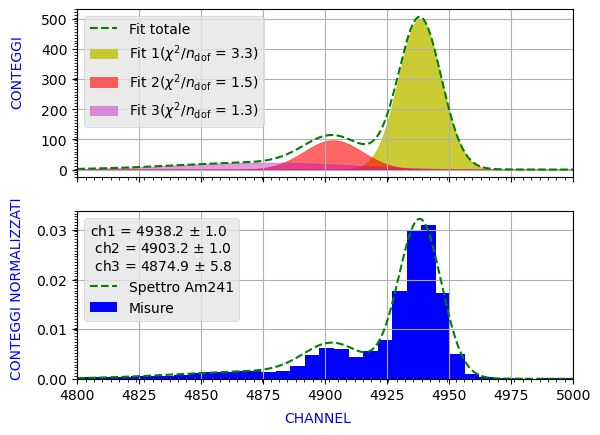

In [2]:
import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
plt.style.use("ggplot")

ax1.xaxis.set_minor_locator(ticker.LinearLocator(60))
ax1.yaxis.set_minor_locator(ticker.LinearLocator(60))
ax2.xaxis.set_minor_locator(ticker.LinearLocator(60))
ax2.yaxis.set_minor_locator(ticker.LinearLocator(60))

fig.text(0.5, 0.02, 'CHANNEL', ha='center', color="b")
fig.text(0.02, 0.75, 'CONTEGGI', va='center', rotation='vertical', color="b")
fig.text(0.02, 0.30, 'CONTEGGI NORMALIZZATI', va='center', rotation='vertical', color="b")

x=np.linspace(4800, 5000, 2000)
functot = lambda x, N1, m1, s1, N2, m2, s2, N3, m3, s3: N1*norm.pdf(x, loc=m1, scale=s1) + N2*norm.pdf(x, loc=m2, scale=s2) + N3*norm.pdf(x, loc=m3, scale=s3)


x1 = np.linspace(4925, 5000)
x2 = np.linspace(4875, 4925)
x3 = np.linspace(4800, 4875)

x1= np.linspace(4800, 5000, 2000)
x2=np.linspace(4800, 5000, 2000)
x3=np.linspace(4800, 5000, 2000)

func= lambda x, N, m, s: N*norm.pdf(x, loc=m, scale=s)

plt.xlim(4800, 5000)
bin_content, bin_edges = np.histogram(signal, bins = nbins)
N_events = sum(bin_content)  

ax2.plot(x, 1/N_events*functot(x, m1.values[0], m1.values[1], m1.values[2], m2.values[0], m2.values[1], m2.values[2], m3.values[0], m3.values[1], m3.values[2] ), linestyle="--", color="g", label="Spettro Am241")
ax2.hist(signal, bins=120, label="Misure", alpha=1, color="b", density=True)

ax2.grid("on")


ax1.plot(x, functot(x, m1.values[0], m1.values[1], m1.values[2], m2.values[0], m2.values[1], m2.values[2], m3.values[0], m3.values[1], m3.values[2] ), linestyle="--", color="g", label="Fit totale")

ax1.fill_between(x1, func(x1, m1.values[0], m1.values[1], m1.values[2]), where=(func(x1, m1.values[0], m1.values[1], m1.values[2]) > 0), color="y", label="Fit 1("f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m1.fmin.reduced_chi2:.1f})", alpha=.8)
ax1.fill_between(x2, func(x2, m2.values[0], m2.values[1], m2.values[2]), where=(func(x2, m2.values[0], m2.values[1], m2.values[2]) > 0), color="r", label="Fit 2("f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m2.fmin.reduced_chi2:.1f})", alpha=.6)
ax1.fill_between(x3, func(x3, m3.values[0], m3.values[1], m3.values[2]), where=(func(x3, m3.values[0], m3.values[1], m3.values[2]) > 0), color="m", label="Fit 3("f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m3.fmin.reduced_chi2:.1f})", alpha=.4)

ax1.grid("on")

fit_info = [
    f"ch1 = {m1.values[1]:.1f} $ \\pm $ {tot1/nbins1:.1f} \n ch2 = {m2.values[1]:.1f} $\\pm$ {tot2/nbins2:.1f} \n ch3 = {m3.values[1]:.1f} $\\pm$ {m3.errors[1]:.1f}",
]



#.legend(title="\n".join(fit_info), frameon=True, loc="lower left")
ax2.legend(title="\n".join(fit_info), frameon=True, loc="upper left")
ax1.legend(frameon=True, loc="upper left")
plt.show()
#print(N1_ext)

#print(m3.errors[1], tot3/nbins3)

<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19732\1177926856.py:20: SyntaxWarning: invalid escape sequence '\p'
  f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m1.fmin.reduced_chi2:.1f} \n ch1 = {mc.values[1]:.1f} $ \pm $ {mc.errors[1]:.1f} \n",


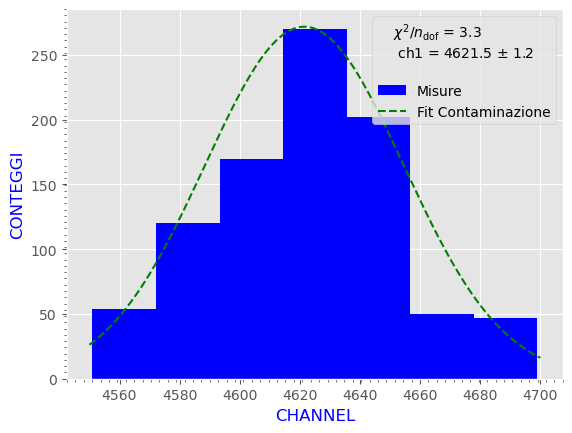

In [31]:

fig, ax = plt.subplots()
plt.style.use("ggplot")

ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))

plt.xlabel("CHANNEL", color="b")
plt.ylabel("CONTEGGI", color="b")

x=np.linspace(4550, 4700, 2000)
func= lambda x, N, m, s: N*norm.pdf(x, loc=m, scale=s)

ax.hist(signalc, bins=7, label="Misure", alpha=1, color="b")

ax.plot(x, N_eventsc/38*func(x, mc.values[0], mc.values[1], mc.values[2]), linestyle="--", color="g", label="Fit Contaminazione")

ax.grid("on")

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m1.fmin.reduced_chi2:.1f} \n ch1 = {mc.values[1]:.1f} $ \pm $ {mc.errors[1]:.1f} \n",
]


#.legend(title="\n".join(fit_info), frameon=True, loc="lower left")
ax.legend(title="\n".join(fit_info), frameon=True, loc="upper right")

plt.show()
#print(N1_ext)

In [4]:
# da calibrazione
#En(ch) = a * ch + b

a = 1.10e-3
erra = 0.19e-3

En_Am1= a*m1.values[1] #En picco a dx (più alto)
err1 = En_Am1*np.sqrt((tot1/nbins1/m1.values[1])**2+(erra/a)**2)

En_Am2=a*m2.values[1] 
err2 = En_Am2*np.sqrt((tot2/nbins2/m2.values[1])**2+(erra/a)**2)

En_Am3=a*m3.values[1] #En picco a sx
err3 = En_Am3*np.sqrt((m3.errors[1]/m3.values[1])**2+(erra/a)**2)

En_c= a*mc.values[1] #En contaminazione
errc = En_c*np.sqrt((mc.errors[1]/mc.values[1])**2+(erra/a)**2)

#En_cont=4627*a+b

E1_exp = 5.486 #in Mev
E2_exp = 5.443
E3_exp = 5.389
#EC_exp = 

print(f" En +- err \t\t E aspettata \t Offset \t\t\t %Exp \t %Mis")

print(f' {En_Am1:.5f} +- {err1:.5f} \t {E1_exp:.5f} \t {En_Am1-E1_exp:.3f} +- {err1:.3f} \t\t 86 \t {(m1.values["N"]) /N_events*100:.1f} \n {En_Am2:.5f} +- {err2:.5f} \t {E2_exp:.5f} \t {En_Am2-E2_exp:.3f} +- {err2:.3f} \t\t 12.5 \t {m2.values["N"] /N_events*100:.1f}\n {En_Am3:.5f} +- {err3:.5f} \t {E3_exp:.5f} \t {En_Am3-E3_exp:.3f} +- {err3:.3f} \t\t 1 \t {m3.values["N"] /N_events*100:.1f}\n')
print(f'En_cont = {En_c:.5f} +- {errc:.5f} ')
#print(my_minuit.values["N1"]/N_events, my_minuit.values["N2"]/N_events, my_minuit.values["N3"]/N_events)
#{En_Am3:.5f} +- {err3:.5f} \t {E3_exp:.5f} \t {En_Am3-E3_exp:.3f} \t\t 1 \t {my_minuit.values["N3"] /N_events*100:.1f}\n')

 En +- err 		 E aspettata 	 Offset 			 %Exp 	 %Mis
 5.43197 +- 0.93825 	 5.48600 	 -0.054 +- 0.938 		 86 	 69.0 
 5.39348 +- 0.93160 	 5.44300 	 -0.050 +- 0.932 		 12.5 	 18.4
 5.36243 +- 0.92626 	 5.38900 	 -0.027 +- 0.926 		 1 	 13.0

En_cont = 5.08363 +- 0.87808 
